In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import math
    
import dakar_utils as dakar
from dakar_utils import sparkline2, sparklineStep, \
                    pos1symbols, posgainLoss, \
                    moreStyleDriverSplitReportBaseDataframe

In [9]:
import sqlite3
from sqlite_utils import Database

dbname = 'dakar_2020.db'

conn = sqlite3.connect(dbname)
db = Database(conn)


In [10]:
from IPython.display import HTML

In [11]:
def col_replacer(row, col, replace):
    return row[col].replace(row[replace],'').strip()

In [12]:
def _rebaseTimes(times, bib=None):
    #If we don't have the bib number we really should raise a warning at least
    if bib is None or bib not in times.index: return times
    return times - times.loc[bib]

In [167]:
REBASER=319
MAX = 20
YEAR=2020

setups = {'sunderland':{'v':'moto','b':3},
          'alo':{'v':'car','b':310},
          'sainz':{'v':'car','b':305},
          'attiyah':{'v':'car', 'b':300},
          'price':{'v':'moto','b':1},
          'peterh':{'v':'car','b':302},
          'trucks':{'v':'truck','b':511},
          'sanz':{'v':'moto','b':14},
          'coronel':{'v':'car', 'b':347},
         }

def get_setup(n):
    return setups[n]['v'],setups[n]['b']

VTYPE, REBASER = get_setup('coronel')

In [168]:
STAGE=12

In [169]:
q=f"SELECT Pos FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Bib={REBASER}"
_rebaser_pos = pd.read_sql(q, conn)['Pos'].iloc[0]
if MAX < _rebaser_pos:
    #Round up to nearest 5
    MAX=int(math.ceil(_rebaser_pos / 5.0) * 5)
MAX

30

In [170]:
q=f"SELECT * FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX})"
tmpq = pd.read_sql(q, conn).fillna(0)
tmpq = tmpq.pivot(index='Bib',columns='Stage',values='GapInS')
tmpq.columns = ['SS_{}_overall'.format(c) for c in tmpq.columns]

_gap_to_leader = tmpq[[c for c in tmpq.columns ]]
tmpq['GapToLeader'] = _gap_to_leader.values.tolist()
tmpq['GapToLeader'] = tmpq['GapToLeader'].apply(lambda x: [-y for y in x])
tmpq['GapToLeader'] = tmpq['GapToLeader'].apply(sparkline2, typ='bar')
tmpq

,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,SS_11_overall,SS_12_overall,GapToLeader
Bib,,,,,,,,,,,,,
300,333.0,367.0,475.0,183.0,359.0,468.0,600.0,400.0,24.0,1090.0,617.0,381.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
301,1692.0,2330.0,3932.0,20974.0,22223.0,23553.0,24750.0,24468.0,24909.0,40673.0,41862.0,41991.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,134.0,797.0,1140.0,702.0,1073.0,980.0,1153.0,789.0,398.0,1106.0,623.0,598.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,21576.0,22935.0,22911.0,23636.0,24403.0,30233.0,30934.0,30348.0,30340.0,30525.0,30681.0,30918.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
304,1396.0,724.0,1422.0,2080.0,2786.0,3339.0,3958.0,3192.0,3477.0,3743.0,3994.0,4029.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
305,170.0,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
306,937.0,1815.0,2885.0,4181.0,8471.0,10196.0,11507.0,12224.0,12625.0,13393.0,14548.0,14659.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
307,390.0,1283.0,2003.0,2680.0,3894.0,4378.0,4556.0,4020.0,4139.0,4539.0,4670.0,4714.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
309,826.0,965.0,1138.0,1390.0,1899.0,2208.0,2664.0,1945.0,2056.0,2446.0,2877.0,2950.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


The following cell errors if the `Bib` is not in the selection.

In [171]:
cols = [c for c in tmpq.columns if c.startswith('SS')]
tmpq[cols] = -tmpq[cols].apply(_rebaseTimes,bib=REBASER, axis=0)

tmpq['Gap']= tmpq[cols].values.tolist()
tmpq['Gap'] = tmpq['Gap'].apply(lambda x: [-y for y in x])
tmpq['Gap'] = tmpq['Gap'].apply(sparkline2, typ='bar')

tmpq.head()

,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,SS_11_overall,SS_12_overall,GapToLeader,Gap
Bib,,,,,,,,,,,,,,
300,3128.0,4969.0,7514.0,11909.0,16182.0,19827.0,26589.0,29939.0,NaN,33848.0,40975.0,42014.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
301,1769.0,3006.0,4057.0,-8882.0,-5682.0,-3258.0,2439.0,5871.0,NaN,-5735.0,-270.0,404.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,3327.0,4539.0,6849.0,11390.0,15468.0,19315.0,26036.0,29550.0,NaN,33832.0,40969.0,41797.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,-18115.0,-17599.0,-14922.0,-11544.0,-7862.0,-9938.0,-3745.0,-9.0,NaN,4413.0,10911.0,11477.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
304,2065.0,4612.0,6567.0,10012.0,13755.0,16956.0,23231.0,27147.0,NaN,31195.0,37598.0,38366.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [172]:
%%capture
q=f"SELECT * FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX}) "
tmpq3 = pd.read_sql(q, conn)
tmpq3 = tmpq3.pivot(index='Bib',columns='Stage',values='Pos')
tmpq3['Overall']= tmpq3[[c for c in tmpq3.columns ]].values.tolist()
tmpq3['Overall'] = tmpq3['Overall'].apply(lambda x: [-y for y in x])
tmpq3['Overall'] = tmpq3['Overall'].apply(sparklineStep)

In [173]:
tmpq3.head()

Stage,1,2,3,4,5,6,7,8,9,10,11,12,Overall
Bib,,,,,,,,,,,,,
300,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
301,16.0,13.0,13.0,44.0,32.0,28.0,24.0,23.0,15.0,33.0,29.0,26.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,2.0,8.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,77.0,67.0,53.0,48.0,38.0,38.0,32.0,28.0,16.0,23.0,20.0,19.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
304,14.0,6.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [174]:
q=f"SELECT * FROM ranking WHERE VehicleType='{VTYPE}' AND Type='stage' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX}) "
tmpq2 = pd.read_sql(q, conn).fillna(0)
tmpq2 = tmpq2.pivot(index='Bib',columns='Stage',values='GapInS')
tmpq2.columns = ['SS_{}'.format(c) for c in tmpq2.columns]
tmpq2 = -tmpq2.apply(_rebaseTimes,bib=REBASER, axis=0)
tmpq2.head()

,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10,SS_11,SS_12
Bib,,,,,,,,,,,,
300,3128.0,1841.0,2545.0,4395.0,4273.0,3645.0,6762.0,3350.0,NaN,1083.0,7127.0,1039.0
301,1769.0,1237.0,1051.0,-12939.0,3200.0,2424.0,5697.0,3432.0,NaN,-13615.0,5465.0,674.0
302,3327.0,1212.0,2310.0,4541.0,4078.0,3847.0,6721.0,3514.0,NaN,1441.0,7137.0,828.0
303,-18115.0,516.0,2677.0,3378.0,3682.0,-2076.0,6193.0,3736.0,NaN,1964.0,6498.0,566.0
304,2065.0,2547.0,1955.0,3445.0,3743.0,3201.0,6275.0,3916.0,NaN,1883.0,6403.0,768.0


In [175]:
tmpq2.head()

,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10,SS_11,SS_12
Bib,,,,,,,,,,,,
300,3128.0,1841.0,2545.0,4395.0,4273.0,3645.0,6762.0,3350.0,NaN,1083.0,7127.0,1039.0
301,1769.0,1237.0,1051.0,-12939.0,3200.0,2424.0,5697.0,3432.0,NaN,-13615.0,5465.0,674.0
302,3327.0,1212.0,2310.0,4541.0,4078.0,3847.0,6721.0,3514.0,NaN,1441.0,7137.0,828.0
303,-18115.0,516.0,2677.0,3378.0,3682.0,-2076.0,6193.0,3736.0,NaN,1964.0,6498.0,566.0
304,2065.0,2547.0,1955.0,3445.0,3743.0,3201.0,6275.0,3916.0,NaN,1883.0,6403.0,768.0


In [176]:
q=f"SELECT * FROM ranking WHERE VehicleType='{VTYPE}' AND Type='stage' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX}) "
tmpq5 = pd.read_sql(q, conn)

tmpq5 = tmpq5.pivot(index='Bib',columns='Stage',values='Pos')
tmpq5['Stage']= tmpq5[[c for c in tmpq5.columns ]].values.tolist()
tmp5_tmp = tmpq5['Stage'].apply(pos1symbols)
tmp5_tmp2 = tmpq5['Stage'].apply(posgainLoss)
posgainLoss
tmpq5['Stage'] = tmpq5['Stage'].apply(lambda x: [-y for y in x])
display(tmpq5['Stage'])
tmpq5['Stage'] = tmpq5['Stage'].apply(sparklineStep)
display(tmp5_tmp)
display(tmp5_tmp2)

Bib
300    [-4.0, -5.0, -5.0, -2.0, -2.0, -3.0, -2.0, -11...
301    [-16.0, -11.0, -19.0, -68.0, -13.0, -12.0, -11...
302    [-2.0, -12.0, -7.0, -1.0, -3.0, -1.0, -3.0, -9...
303    [-77.0, -18.0, -2.0, -8.0, -9.0, -42.0, -8.0, ...
304    [-14.0, -1.0, -9.0, -6.0, -6.0, -8.0, -7.0, -4...
305    [-3.0, -6.0, -1.0, -3.0, -1.0, -2.0, -1.0, -15...
306    [-12.0, -14.0, -13.0, -14.0, -30.0, -16.0, -13...
307    [-5.0, -15.0, -10.0, -7.0, -12.0, -7.0, -4.0, ...
309    [-9.0, -7.0, -6.0, -4.0, -4.0, -4.0, -5.0, -5....
310    [-11.0, -63.0, -4.0, -13.0, -7.0, -6.0, -6.0, ...
311    [-6.0, -2.0, -8.0, -10.0, -5.0, -9.0, -9.0, -3...
312    [-15.0, -20.0, -15.0, -19.0, -17.0, -17.0, -57...
314    [-10.0, -31.0, -12.0, -62.0, -61.0, -13.0, -12...
315    [-7.0, -4.0, -11.0, -5.0, -10.0, -5.0, -21.0, ...
318    [-44.0, -25.0, -37.0, -24.0, -23.0, -27.0, -24...
320    [-18.0, -28.0, -16.0, -12.0, -16.0, -22.0, -22...
321    [-56.0, -22.0, -24.0, -23.0, -27.0, -26.0, -29...
322    [-17.0, -35.0, -26.0

Bib
300    [F, F, F, F, F, F, F, F, F, F, F, T]
301    [F, F, F, F, F, F, F, F, F, F, F, F]
302    [F, F, F, T, F, T, F, F, T, F, T, F]
303    [F, F, F, F, F, F, F, F, F, F, F, F]
304    [F, T, F, F, F, F, F, F, F, F, F, F]
305    [F, F, T, F, T, F, T, F, F, T, F, F]
306    [F, F, F, F, F, F, F, F, F, F, F, F]
307    [F, F, F, F, F, F, F, F, F, F, F, F]
309    [F, F, F, F, F, F, F, F, F, F, F, F]
310    [F, F, F, F, F, F, F, F, F, F, F, F]
311    [F, F, F, F, F, F, F, F, F, F, F, F]
312    [F, F, F, F, F, F, F, F, F, F, F, F]
314    [F, F, F, F, F, F, F, F, F, F, F, F]
315    [F, F, F, F, F, F, F, T, F, F, F, F]
318    [F, F, F, F, F, F, F, F, F, F, F, F]
320    [F, F, F, F, F, F, F, F, F, F, F, F]
321    [F, F, F, F, F, F, F, F, F, F, F, F]
322    [F, F, F, F, F, F, F, F, F, F, F, F]
323    [F, F, F, F, F, F, F, F, F, F, F, F]
324    [F, F, F, F, F, F, F, F, F, F, F, F]
326    [F, F, F, F, F, F, F, F, F, F, F, F]
327    [F, F, F, F, F, F, F, F, F, F, F, F]
331    [F, F, F, F, F, F, F,

Bib
300    [nan, -1.0, -0.0, 3.0, -0.0, -1.0, 1.0, -9.0, ...
301    [nan, 5.0, -8.0, -49.0, 55.0, 1.0, 1.0, 1.0, -...
302    [nan, -10.0, 5.0, 6.0, -2.0, 2.0, -2.0, -6.0, ...
303    [nan, 59.0, 16.0, -6.0, -1.0, -33.0, 34.0, 2.0...
304    [nan, 13.0, -8.0, 3.0, -0.0, -2.0, 1.0, 3.0, -...
305    [nan, -3.0, 5.0, -2.0, 2.0, -1.0, 1.0, -14.0, ...
306    [nan, -2.0, 1.0, -1.0, -16.0, 14.0, 3.0, -9.0,...
307    [nan, -10.0, 5.0, 3.0, -5.0, 5.0, 3.0, -3.0, -...
309    [nan, 2.0, 1.0, 2.0, -0.0, -0.0, -1.0, -0.0, -...
310    [nan, -52.0, 59.0, -9.0, 6.0, 1.0, -0.0, 4.0, ...
311    [nan, 4.0, -6.0, -2.0, 5.0, -4.0, -0.0, 6.0, -...
312    [nan, -5.0, 5.0, -4.0, 2.0, -0.0, -40.0, 40.0,...
314    [nan, -21.0, 19.0, -50.0, 1.0, 48.0, 1.0, 4.0,...
315    [nan, 3.0, -7.0, 6.0, -5.0, 5.0, -16.0, 20.0, ...
318    [nan, 19.0, -12.0, 13.0, 1.0, -4.0, 3.0, 4.0, ...
320    [nan, -10.0, 12.0, 4.0, -4.0, -6.0, -0.0, -1.0...
321    [nan, 34.0, -2.0, 1.0, -4.0, 1.0, -3.0, -3.0, ...
322    [nan, -18.0, 9.0, 17

In [177]:
tmpq5.head()

Stage,1,2,3,4,5,6,7,8,9,10,11,12,Stage
Bib,,,,,,,,,,,,,
300,4.0,5.0,5.0,2.0,2.0,3.0,2.0,11.0,2.0,17.0,2.0,1.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
301,16.0,11.0,19.0,68.0,13.0,12.0,11.0,10.0,12.0,64.0,12.0,12.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,2.0,12.0,7.0,1.0,3.0,1.0,3.0,9.0,1.0,10.0,1.0,5.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,77.0,18.0,2.0,8.0,9.0,42.0,8.0,6.0,4.0,2.0,5.0,14.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
304,14.0,1.0,9.0,6.0,6.0,8.0,7.0,4.0,8.0,3.0,6.0,7.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [178]:
q=f"SELECT Bib, Pos, Crew, Brand FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX} ORDER BY Pos"
tmpq4 = pd.read_sql(q, conn).set_index('Bib')

tmpq4

,Pos,Crew,Brand
Bib,,,
305,1,C. SAINZ L. CRUZ BAHRAIN JCW X-RAID TEAM,MINI
300,2,N. AL-ATTIYAH M. BAUMEL TOYOTA GAZOO RACING,TOYOTA
302,3,S. PETERHANSEL P. FIUZA BAHRAIN JCW X-RAID TEAM,MINI
309,4,Y. AL RAJHI K. ZHILTSOV OVERDRIVE TOYOTA,TOYOTA
304,5,G. DE VILLIERS A. HARO BRAVO TOYOTA GAZOO RACING,TOYOTA
311,6,O. TERRANOVA B. GRAUE X-RAID MINI JCW TEAM,MINI
307,7,B. TEN BRINKE T. COLSOUL TOYOTA GAZOO RACING,TOYOTA
315,8,M. SERRADORI F. LURQUIN SRT RACING,CENTURY
324,9,Y. SEAIDAN K. ALEXY RACE WORLD TEAM,MINI


In [179]:
q=f"SELECT Bib, Team FROM teams WHERE Year={YEAR};"
TEAMS = pd.read_sql(q, conn).fillna(0).set_index('Bib')
tmpq4 = tmpq4.merge(TEAMS, left_index=True, right_index=True)
tmpq4['Crew'] = tmpq4.apply(col_replacer,col='Crew',replace='Team', axis=1)
tmpq4.columns = ['Pos','Crew','Team','Brand']
tmpq4

,Pos,Crew,Team,Brand
Bib,,,,
305,1,C. SAINZ L. CRUZ,MINI,BAHRAIN JCW X-RAID TEAM
300,2,N. AL-ATTIYAH M. BAUMEL,TOYOTA,TOYOTA GAZOO RACING
302,3,S. PETERHANSEL P. FIUZA,MINI,BAHRAIN JCW X-RAID TEAM
309,4,Y. AL RAJHI K. ZHILTSOV,TOYOTA,OVERDRIVE TOYOTA
304,5,G. DE VILLIERS A. HARO BRAVO,TOYOTA,TOYOTA GAZOO RACING
311,6,O. TERRANOVA B. GRAUE,MINI,X-RAID MINI JCW TEAM
307,7,B. TEN BRINKE T. COLSOUL,TOYOTA,TOYOTA GAZOO RACING
315,8,M. SERRADORI F. LURQUIN,CENTURY,SRT RACING
324,9,Y. SEAIDAN K. ALEXY,MINI,RACE WORLD TEAM


In [180]:
tmpq4.head()

,Pos,Crew,Team,Brand
Bib,,,,
305,1,C. SAINZ L. CRUZ,MINI,BAHRAIN JCW X-RAID TEAM
300,2,N. AL-ATTIYAH M. BAUMEL,TOYOTA,TOYOTA GAZOO RACING
302,3,S. PETERHANSEL P. FIUZA,MINI,BAHRAIN JCW X-RAID TEAM
309,4,Y. AL RAJHI K. ZHILTSOV,TOYOTA,OVERDRIVE TOYOTA
304,5,G. DE VILLIERS A. HARO BRAVO,TOYOTA,TOYOTA GAZOO RACING


In [181]:
tmpq3.dtypes

Stage
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
Overall     object
dtype: object

In [182]:
results = pd.merge(tmpq4,tmpq3[['Overall']], left_index=True, right_index=True)
results = pd.merge(results,tmpq2, left_index=True, right_index=True)
results = pd.merge(results,tmpq5[['Stage']], left_index=True, right_index=True)
results = pd.merge(results,tmpq, left_index=True, right_index=True)
results.head()
#rb2cTop10.head(3)['test'].apply(sparkline2, typ='bar');

,Pos,Crew,Team,Brand,Overall,SS_1,SS_2,SS_3,SS_4,SS_5,...,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,SS_11_overall,SS_12_overall,GapToLeader,Gap
Bib,,,,,,,,,,,,,,,,,,,,,
305,1,C. SAINZ L. CRUZ,MINI,BAHRAIN JCW X-RAID TEAM,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3291.0,1762.0,2936.0,4103.0,4449.0,...,16541.0,20295.0,27189.0,30339.0,NaN,34938.0,41592.0,42395.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
300,2,N. AL-ATTIYAH M. BAUMEL,TOYOTA,TOYOTA GAZOO RACING,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3128.0,1841.0,2545.0,4395.0,4273.0,...,16182.0,19827.0,26589.0,29939.0,NaN,33848.0,40975.0,42014.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,3,S. PETERHANSEL P. FIUZA,MINI,BAHRAIN JCW X-RAID TEAM,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3327.0,1212.0,2310.0,4541.0,4078.0,...,15468.0,19315.0,26036.0,29550.0,NaN,33832.0,40969.0,41797.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
309,4,Y. AL RAJHI K. ZHILTSOV,TOYOTA,OVERDRIVE TOYOTA,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",2635.0,1736.0,2480.0,3851.0,3940.0,...,14642.0,18087.0,24525.0,28394.0,NaN,32492.0,38715.0,39445.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
304,5,G. DE VILLIERS A. HARO BRAVO,TOYOTA,TOYOTA GAZOO RACING,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",2065.0,2547.0,1955.0,3445.0,3743.0,...,13755.0,16956.0,23231.0,27147.0,NaN,31195.0,37598.0,38366.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [183]:
dakar.moveColumn(results, 'GapToLeader', right_of='Stage')


In [184]:
s2 = moreStyleDriverSplitReportBaseDataframe(results,'')
display(HTML(s2))

,Pos,Crew,Team,Brand,Overall,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10,SS_11,SS_12,Stage,GapToLeader,SS_1Overall,SS_2Overall,SS_3Overall,SS_4Overall,SS_5Overall,SS_6Overall,SS_7Overall,SS_8Overall,SS_9Overall,SS_10Overall,SS_11Overall,SS_12Overall,Gap
Bib,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
305,1,C. SAINZ L. CRUZ,MINI,BAHRAIN JCW X-RAID TEAM,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAACA0lEQVR4nO3bT2vTcBzH8ffECdvBi4zCvE9xFx%2BFN/Hk4/EZePUZeBLE6067ihfxtgnf/sNDSds0SZukTdN4KCtkg4n9dq2Oz%2Bv2DSH8aN6EH226V1VVhciaHux6AfJ/U0DiooDE5eGuF3Ddx68dvnz/tetl3Gsvjh/z7vXpRq61sYB6vd5GrvPpW5PLIOPk6GAj15Ob0jS9cb8ajcZa19rqE%2Bjzj4Czi8Gt51zF8%2BHt8y2tSjy2ugc6uxhwGWS3nnNydMCrZ0%2B2tCLx2voeSE%2BX%2B%2BXOAnp/3uFnkNaOaW9z/2wsoOubsMPDPvv789qx0%2BNHvHn5dO0Nm/x79vRThnjoi0RxUUDiooDERQGJiwISFwUkLgpIXBSQuCggcVFA4qKAxEUBiYsCEhcFJC4KSFwUkLgoIHG504DMjDAMAaiqCjNjNBoBsFgsMDOiKAKgLMvaPJ/PMTPiOAagKArMjCRJAJjNZpgZ4/G4Nk8mEwCm0ylmRpou38vO87w2Z1mGmZFly3%2BJpGmKmZHneW2eTqcATCYTzIzZbAbAeDyuzUmSYGYURQFAHMeYGfP58rXeKIowM8qyrM2LxQKA0WiEmXH1gmgYhpjZ6rMcDoc0m83VPBgMaLVaq7nf79Nut2tzp9NZzUEQ0O12/3zT/pKeQOKid6LFRU8gcVFA4qKAxEUBictva78BXFflE6wAAAAASUVORK5CYII%3D"" />",3291,1762,2936,4103,4449,3754,6894,3150,0,2149,6654,803,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAC/0lEQVR4nO3bS2sTURTA8X/FKC0lGwmlD4qrKqmUUhBxLbqTUlCEfgH1U/gN3IpfQBAL0q0rd1IKUlwErXDSppZQ8p48ZvJ2URtN2yTT3Omksee3u9PbM4eTM7d3JtORZrPZRKk%2BXRl0Amq4aQMpI9pAysjVQSdw3LuNGOtb%2Bz3nLS9Os3pv1jiOl7F6xXHDy7z94FkDHRwceBJnbTPKdsJmLjTacc52wqZarfDg5nWjOABffxXYiKZZ24x2nQOwNDNulJMbbvP26nxHJiYm%2Bvq9C7cCAcyFRnnz9HbHn7/88N2TOAAfvyX49CPVdc7SzDiPbt1gZSFknJMbbvL28nwmzq2BXn%2BO8TNROnG81wfh1nbC7lpEN1cxwMpCyJN8BqFXDcC7enfiWQMdXwLHxpIEArW2Y5G4RSCQ58XDOx3jBAJyarx/Pblb7rlPmJ%2B6xvLidN9L81m5ydvLOG5q4Kbeps5tBXr1eP7EsWdvv3gSe/Xe7MA3j4PmpgZe1bsbvY1XRi7kJvp/5eYWPRK3CE8GfcrInK5APlrf2icSt7rOCU8GWV6c9ikjc76vQJG41fVv87BdgWcVngzy/vl93853Wr3DU8FT96j98LWB3FxZw3YFXmR%2B1NHXBtK7J3/5UW/dAykj2kDKiDaQMqINpIycawOJCJlMBoBms4mIkM1mAWg0GogIuVwOgHq93jau1WqICJZ1%2BNykWq0iIuTzeQAqlQoiQqFQaBsXi0UAyuUyIkKpdPiFruM4bWPbthERbNsGoFQqISI4jtM2LpfLABSLRUSESqUCQKFQaBvX63Ucx6FarQJgWRYiQq12%2BH1gLpf7E7vZGosIjUYDgGw2i4hw9Ip6JpNBRFq1TKfTRKN/XzlJpVLs7Oy0xslkkt3d3bZxLBZrjROJBHt7ez0/s7PSFUgZGdH/yvDG0cO6bg8J3cwZNroCKSPaQMqINpAyog2kjGgDKSPaQMqIvpHoocv4rpM2kEcu67tO%2BiBRGdE9kDKiDaSMaAMpI9pAyshvIh2MKU69bmQAAAAASUVORK5CYII%3D"" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAAxklEQVR4nO3aTQqCQACGYSfaeARv4C28lffzNB2h5bQILYhA%2BhjKeJ6NguPP4mUUmVJrrR186PTtB%2BDYBEREQETOTa9eyrZ7mefuOo6PY9N03y7L%2B/PXMUT6vu%2BGYWhy7dL0I/opoBfrbfeM4Wd5hREREBEBEREQEQERERARAREREBEBEREQEQERERARAREREJG264Esx/h7ZiAiAiIiICICIiIgIgIiIiAiAiIiICJt/0Tv4W/1oZmBiAiIiICICIiIgIjcAAqlFkGALCDbAAAAAElFTkSuQmCC"" />",3291,5053,7989,12092,16541,20295,27189,30339,0,34938,41592,42395,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAABAklEQVR4nO3bwQ2CMBjFcWq8OIIbsEW3Ygi2Ygs2cASP5WAUE2Jaef2ghf/vgglIe3h5Xz3oQgihAVa67L0B1I0AQUKAILmavt25z8dH1zXPtp3vef%2B6DsPv73sfv7/VO3KtE2Ow19s4Nve%2Bn5/JeOx1poforwAtvJeNPVPKO3KtE7PVXjOxbSB%2B4B2ebYBSELKqcYiGZP8GiqGhikYDQUKAICl/hKVgzO2GBoLkGA0UQ0OZoYEgIUCQnGOEpWDMrUIDQUKAICFAkHAG%2BgfnpAUaCBIaKKcTNhQNBAkBgoQRVprKxiANBAkBgoQAQWL7x0IcHg0ECQGChABBQoAgIUCQTA09UDxHCGn4AAAAAElFTkSuQmCC"" />"
300,2,N. AL-ATTIYAH M. BAUMEL,TOYOTA,TOYOTA GAZOO RACING,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA

In [185]:
if not MAX:
    TYP='All'
else:
    TYP=f'top_{MAX}'

img = dakar.getTablePNG(s2,fnstub=f'overall_SS{STAGE}_{VTYPE}_{REBASER}')
img

'testpng/overall_SS12_car_347.png'

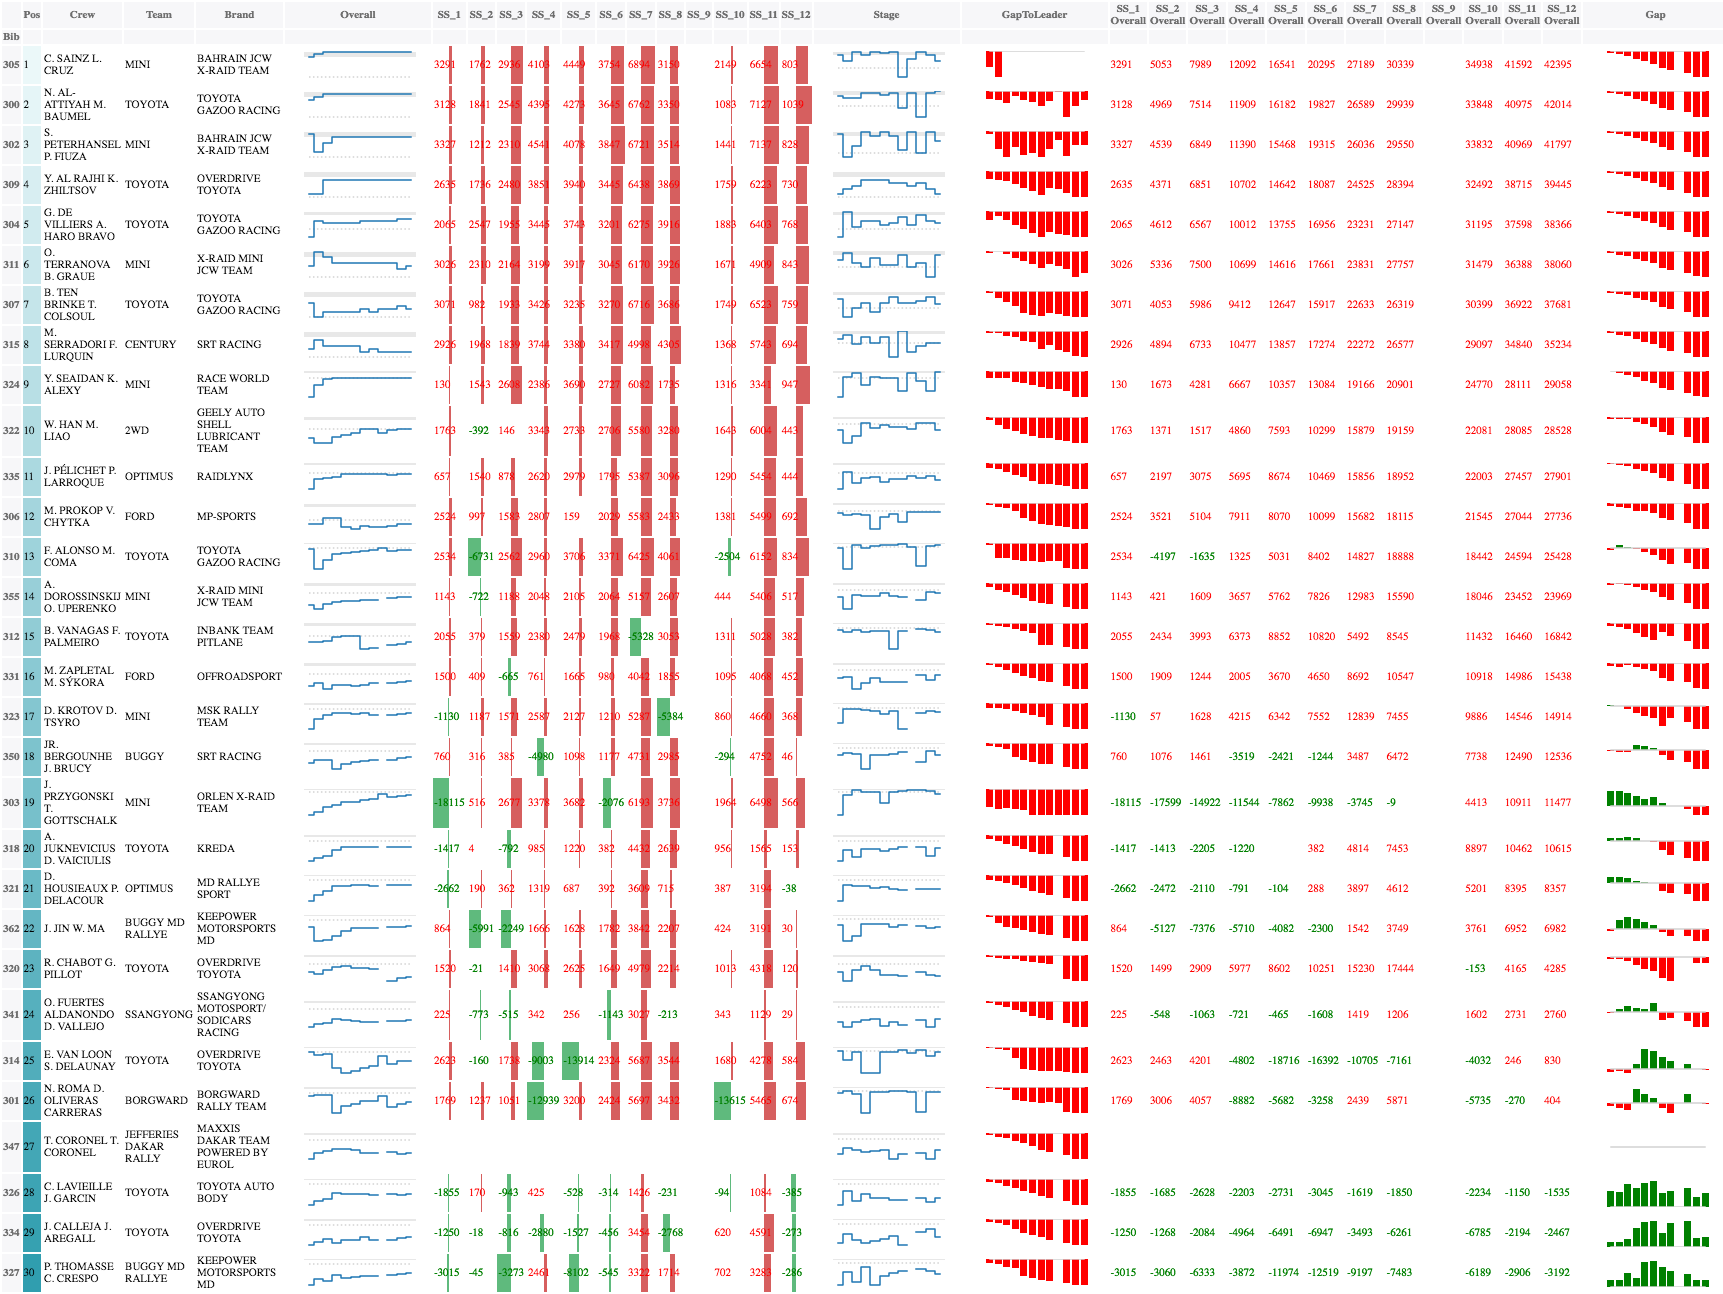

In [186]:
from IPython.display import Image
Image(img)

Chart ranking across stage and overall for a particular driver

In [187]:
import matplotlib.pyplot as plt

q=f'''
SELECT o.Bib, o.Stage SS, o.Pos Overall, s.Pos Stage FROM ranking o JOIN ranking s 
ON s.Bib=o.Bib AND s.Stage=o.Stage AND s.Type='stage' AND o.Type='general' AND s.Bib={REBASER}
WHERE o.Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX})

'''

data = pd.read_sql(q, conn).set_index('Bib')
data

,SS,Overall,Stage
Bib,,,
347,1,35,35
347,2,27,26
347,3,24,28
347,4,21,32
347,5,22,31
347,6,23,29
347,7,27,44
347,8,27,35
347,10,26,33


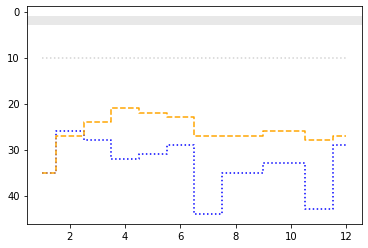

In [188]:
fig, ax = plt.subplots(1, 1)

plt.axhspan(1, 3, facecolor='lightgrey', alpha=0.5)
ax.plot(data['SS'], [10]*len(data[['Stage','Overall']]), linestyle=':', color='lightgrey')
ax.step(data['SS'], data['Stage'], where='mid', linestyle=':', color='blue')
ax.step(data['SS'], data['Overall'], where='mid', color='orange', linestyle='--')

plt.gca().invert_yaxis()

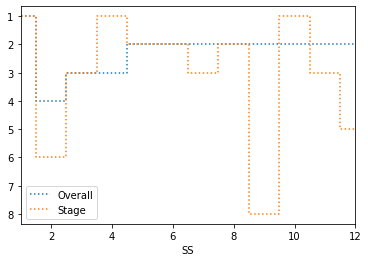

In [126]:
data.plot(x='SS',drawstyle="steps-mid",linestyle=':')
plt.gca().invert_yaxis()

In [59]:
data

,SS,Overall,Stage
Bib,,,
305,1,3,3
305,2,2,6
305,3,1,1
305,4,1,3
305,5,1,1
305,6,1,2
305,7,1,1
305,8,1,15
305,9,1,5


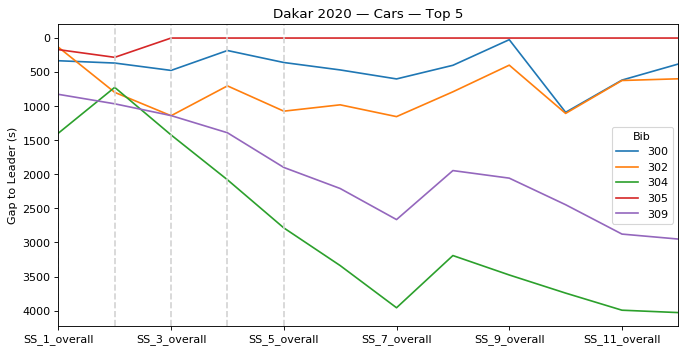

In [60]:
import matplotlib.pyplot as plt
w=10
h=5
d=80

plt.figure(figsize=(w, h), dpi=d)
ax = plt.gca()

q=f"SELECT * FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='{VTYPE}' AND Type='general' AND Stage={STAGE} AND Pos<={MAX} ORDER BY Pos LIMIT 5)"
tmpq = pd.read_sql(q, conn).fillna(0)
tmpq = tmpq.pivot(index='Bib',columns='Stage',values='GapInS')
tmpq.columns = ['SS_{}_overall'.format(c) for c in tmpq.columns]

_gap_to_leader = tmpq[[c for c in tmpq.columns ]]
_gap_to_leader.T.plot(ax=ax, title='Dakar 2020 — Cars — Top 5')

for i in range(5):
    plt.axvline(i, linestyle='--', color='lightgrey')

plt.ylabel('Gap to Leader (s)')

ax.invert_yaxis()